# Case Study 2 : Data Science in Financial Data

# Problem: pick a data science problem that you plan to solve using Stock Price Data



We will be examining the problem of how to choose which stocks are the best choice to buy in order to make consistent and meaningful returns in the stock market.

# Data Exploration: Exploring the Dataset

**plot the weekly returns of a set of stocks of your choice** 


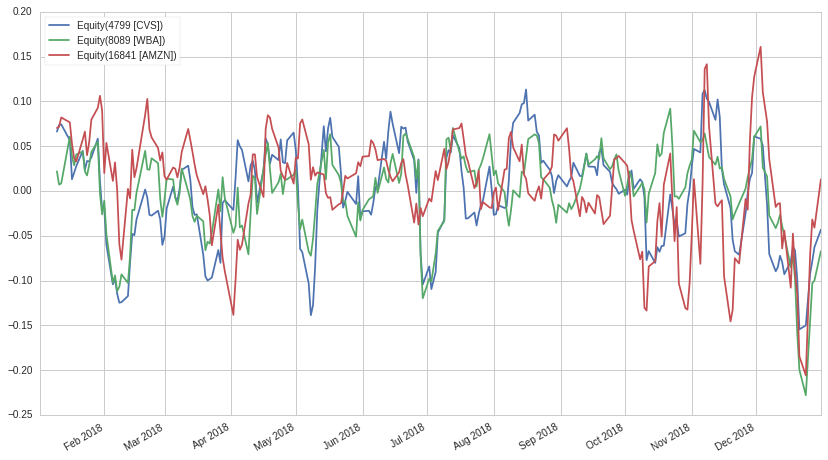

In [1]:
from quantopian.research import returns, symbols
# Returns
r = returns(
    assets=symbols(['CVS','WBA', 'AMZN']),
    start='2018-01-01',
    end='2019-01-01',
)

# Weekly Returns
avg= r.rolling(7).sum()
avg.plot()

# The Solution: implement a data science solution to the problem you are trying to solve.

We will be examining 4 different solutions for this problem. Each is discussed in its own section.

1. Momentum
2. Mean Reversion
3. Cointegration
4. P/E Ratio

# Method 1. Momentum

This strategy seeks to pick stocks to purchase by trying to take advantage of stocks that are currently experiencing positive momentum. When a stock is experiencing a particularly strong upward momentum, we buy it in an attempt to ride it to the top.

## Data Collection/Processing

In [2]:
from quantopian.research import prices, symbols
import pandas as pd
import operator

# Query historical pricing data for AAPL
aapl_close = prices(
    assets=symbols('AAPL'),
    start='2016-10-20',
    end='2019-10-20',)
# Query historical pricing data for NFLX
nflx_close = prices(
    assets=symbols('NFLX'),
    start='2016-10-20',
    end='2019-10-20',)
# Query historical pricing data for AMZN
amzn_close = prices(
    assets=symbols('AMZN'),
    start='2016-10-20',
    end='2019-10-20',)
# Query historical pricing data for MSFT
msft_close = prices(
    assets=symbols('MSFT'),
    start='2016-10-20',
    end='2019-10-20',)
# Query historical pricing data for TSLA
tsla_close = prices(
    assets=symbols('TSLA'),
    start='2016-10-20',
    end='2019-10-20',)

aapl_sma200 = aapl_close.rolling(200).mean()
aapl_sma30 = aapl_close.rolling(30).mean()
msft_sma200 = msft_close.rolling(200).mean()
msft_sma30 = msft_close.rolling(30).mean()
tsla_sma200 = tsla_close.rolling(200).mean()
tsla_sma30 = tsla_close.rolling(30).mean()

## The Solution: implement a data science solution to the problem you are trying to solve.

1. Measure the 100-day trailing returns of a basket of stocks;

2. Find those positive trailing returns, then rank those stocks based upon trailing returns of stocks;

3. If the top n (e.g. n = 3) stocks whose monthly price >= 200-day simple moving average, buy;

4. Else, hold.

In [3]:
# 100-day trailing return 
def trailing_return(data, day=100):
    return data[-1]-data[-day]

stock_list = [aapl_close,nflx_close,amzn_close,msft_close,tsla_close]
trailing_return_result = []
for i in stock_list:
    trailing_return_result.append(trailing_return(i,100))
trailing_return_result

dic_trailing_return = {'aapl':trailing_return_result[0], 
                       'nflx':trailing_return_result[1], 
                       'amzn':trailing_return_result[2],
                       'msft':trailing_return_result[3],
                       'tsla':trailing_return_result[4]}
dic_trailing_return

# rank the trailing return
sorted_trailing_return = sorted(dic_trailing_return.items(), key=operator.itemgetter(1))
sorted_trailing_return

# choose top k=3, which is 
k = 3
for i in range(1,k+1):
    print(sorted_trailing_return[-i])
    
def buy_hold(data,SMA=200,monthly=30):
    if data.rolling(SMA).mean()[-1]<=data.rolling(monthly).mean()[-1]:
        return True
    return False

('tsla', 68.810000000000002)
('aapl', 58.705000000000013)
('msft', 12.027000000000001)


## Results: summarize and visualize the results discovered from the analysis

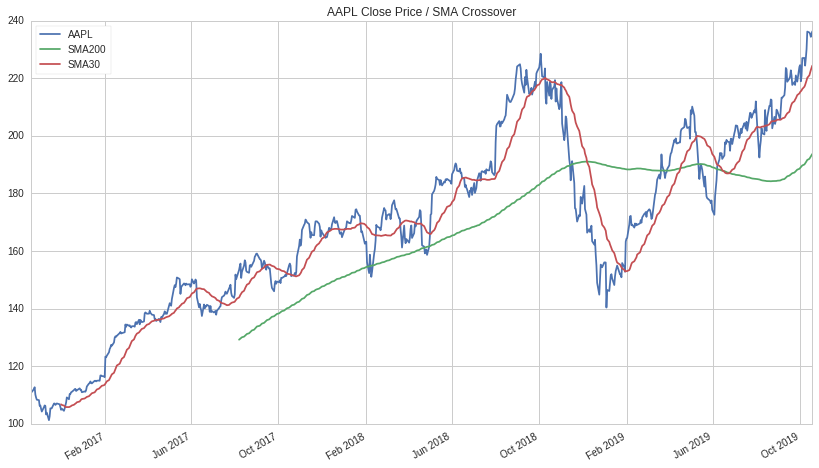

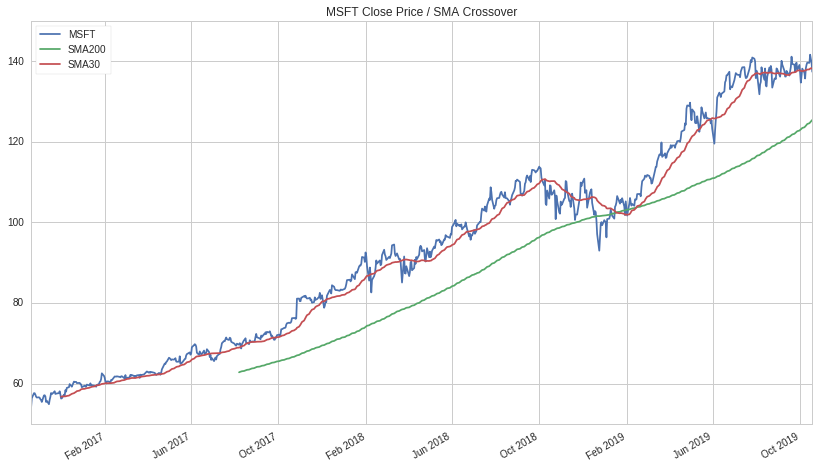

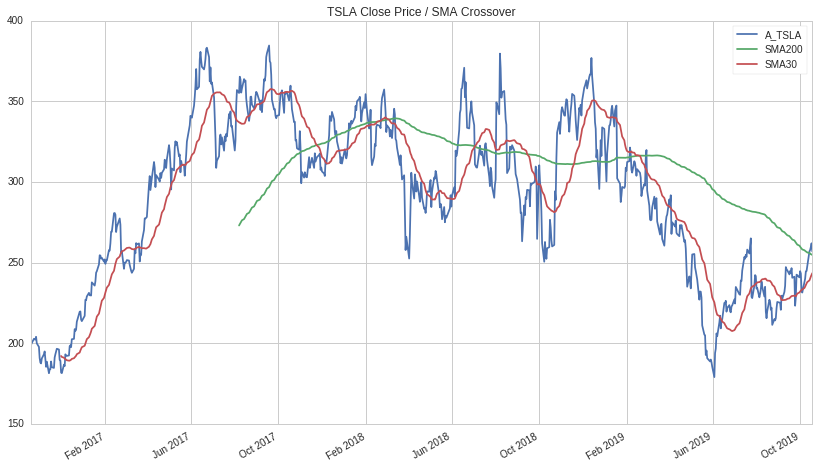

In [4]:
# Combine results into a pandas DataFrame and plot
pd.DataFrame({   
    'AAPL': aapl_close,
    'SMA30': aapl_sma30,
    'SMA200': aapl_sma200
}).plot(
    title='AAPL Close Price / SMA Crossover'
);

pd.DataFrame({   
    'MSFT': msft_close,
    'SMA30': msft_sma30,
    'SMA200': msft_sma200
}).plot(
    title='MSFT Close Price / SMA Crossover'
);

pd.DataFrame({   
    'A_TSLA': tsla_close,
    'SMA30': tsla_sma30,
    'SMA200': tsla_sma200
}).plot(
    title='TSLA Close Price / SMA Crossover'
);


# Method 2: Mean Reversion

This method attempts to determine when to buy a stock buy using a mean reversion strategy. The mean reversion strategy examines when the short term average price of a company is significantly lower than the long term average. As this point when the company is cheaper, it should be purchased. The assumption is that it value will eventually return back to its higher average value.

## Data Collection/Preprocessing

In [5]:
from quantopian.research import prices, symbols
import pandas as pd

# SPY prices and MA
SPY = prices(
    assets=symbols('SPY'),
    start='2009-01-01',
    end='2019-01-01'
)

SPY_ma200 = SPY.rolling(200).mean()
SPY_ma50 = SPY.rolling(50).mean()

# Tesla prices and MA
tesla = prices(
    assets=symbols('TSLA'),
    start='2013-01-01',
    end='2019-01-01'
)

tesla_ma200 = tesla.rolling(200).mean()
tesla_ma50 = tesla.rolling(50).mean()

# GoPro prices and MA
GPRO = prices(
    assets=symbols('GPRO'),
    start='2015-01-01',
    end='2019-01-01'
)

GPRO_ma200 = GPRO.rolling(200).mean()
GPRO_ma50 = GPRO.rolling(50).mean()

## The Solution: implement a data science solution to the problem you are trying to solve

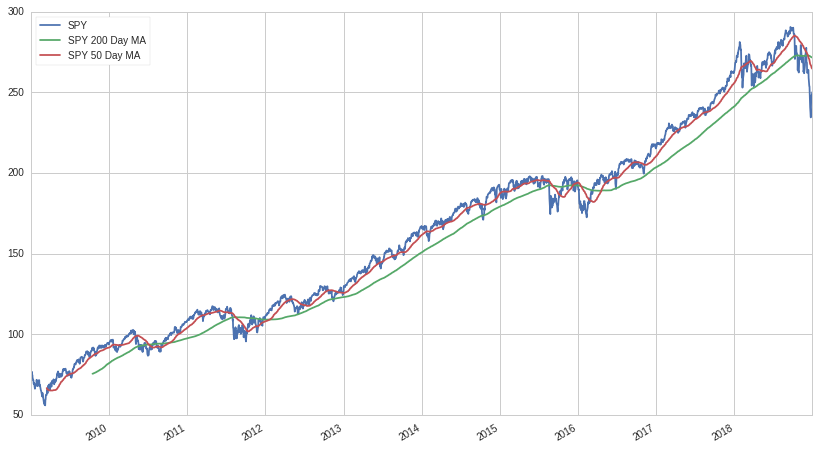

In [6]:
# Plot SPY
pd.DataFrame({
    'SPY': SPY,
    'SPY 200 Day MA': SPY_ma200,
    'SPY 50 Day MA': SPY_ma50
}).plot()

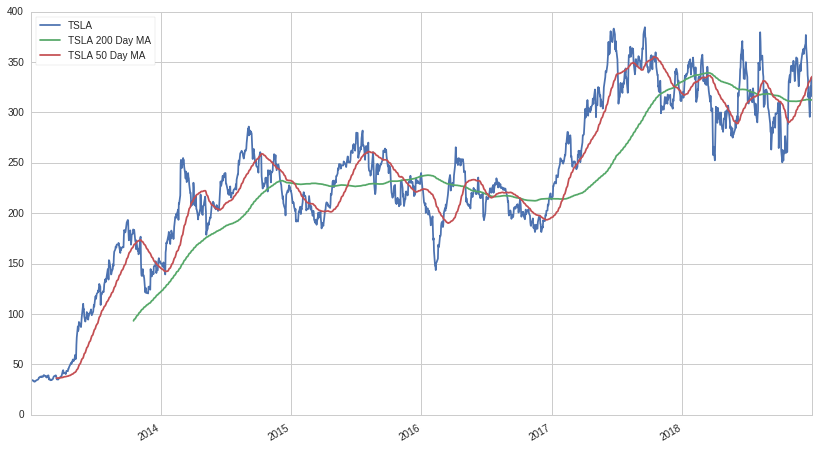

In [7]:
# Plot Tesla
pd.DataFrame({
    'TSLA': tesla,
    'TSLA 200 Day MA': tesla_ma200,
    'TSLA 50 Day MA': tesla_ma50
}).plot()

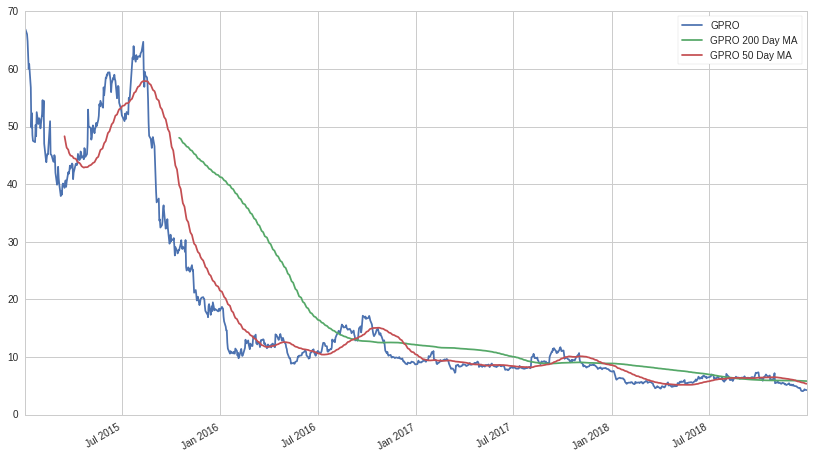

In [8]:
# Plot GoPro
pd.DataFrame({
    'GPRO': GPRO,
    'GPRO 200 Day MA': GPRO_ma200,
    'GPRO 50 Day MA': GPRO_ma50
}).plot()

## Results: summarize and visualize the results discovered from the analysis

Lets examine the results from the plots above.

SPY: In the plot of SPY, there are very few small buying opportunities according to this strategy. SPY performs faily consistently, so there are not many times when the short term average will be significantly lower than the long term average. In this case, a trader would be better off buying and holding than trying to use a mean reversion strategy.

TSLA: TSLA has more volatility than SPY and is a better candidate for this strategy. The stock price experiences many highs and lows, but the lows have been quite temporary. This makes buying when the short term moving average is low a good strategy.

GPRO: The GPRO plot shows the greatest danger with this strategy: buying low and the stock price never recovering. This highlights why is it important to have a strong exit strategy that dictates when to cut losses.

# Method 3: Cointegration

Finds the Best pair among 10 companies regarding the stock trends from January to October 2019.

Define the one with higher stock price as Long-term stock and other be the short-term stock.
Sharp differ in the critical slope indicates, in a short period, one stock in the Best pair increases while the other one drops, that is the best time to manipulate the stock.

Negative slope: Buy short-term and sell long-term
Positive slope: Buy long-term and sell short-term

## Data Collection/Preprocessing

In [9]:
# Get Price
p = get_pricing(
    ['CVS','WBA'],
    fields='price', # price, open_price, close_price, high, low or volume
    start_date='2019-01-01', 
    end_date = '2019-10-01',
    frequency='daily', # minute or daily   
)

# Get Volume
v = get_pricing(
    ['CVS','WBA'],
    fields='volume', # price, open_price, close_price, high, low or volume
    start_date='2019-01-01', 
    end_date = '2019-10-01',
    frequency='daily', # minute or daily   
)

## The Solution: implement a data science solution to the problem you are trying to solve.

In [10]:
# Use the Cointegration Algorithm to find the accepted P values which determind the pair of stock company
import numpy as np
import pandas as pd

import seaborn
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [11]:
# Define the Top 10 fast-food company stock and get 2019 stock price
symbol_list = ['MCD','PZZA','JJSF','CMG','WEN','TXRH','SBUX','CAKE','DNKN','DPZ','DQ']
prices_df = get_pricing(symbol_list, fields=['price']
                               , start_date='2019-01-01', end_date='2019-10-01')['price']
prices_df.columns = map(lambda x: x.symbol, prices_df.columns)

[(u'MCD', u'TXRH'), (u'MCD', u'DNKN'), (u'CMG', u'TXRH'), (u'WEN', u'TXRH'), (u'WEN', u'DQ'), (u'TXRH', u'DNKN'), (u'TXRH', u'DQ'), (u'SBUX', u'DNKN'), (u'DNKN', u'DQ')]


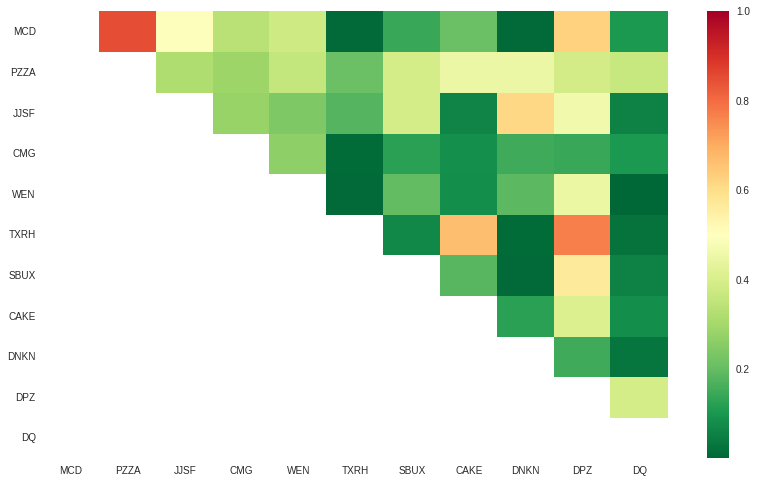

In [12]:
# Find the cointegration pair and plot the heat map
scores, pvalues, pairs = find_cointegrated_pairs(prices_df)
seaborn.heatmap(pvalues, xticklabels=symbol_list, yticklabels=symbol_list, 
                cmap='RdYlGn_r', mask = (pvalues >=0.95)
                )
plt.yticks(rotation=360)
print(pairs)

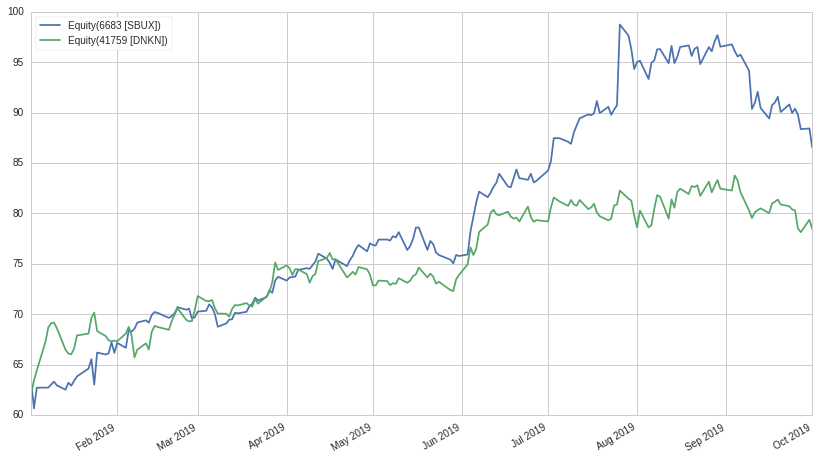

In [13]:
s_long = 'SBUX'  
s_short = 'DNKN'
def plotPair(s_long, s_short):
    p = get_pricing(
        [s_long,s_short], # symbols 
        fields='price', # price, open_price, close_price, high, low or volume
        start_date='2019-01-01', 
        end_date = '2019-10-01',
        frequency='daily' # minute or daily   
    )
    p.plot()
    return p

p = plotPair(s_long, s_short)

## Results: summarize and visualize the results discovered from the analysis

In [14]:
# Build the Hedge Model by using Linear Regression Model
def HedgeModel(p):
    # price (long)
    p_long  = p.iloc[:,0]
    # price (short)
    p_short = p.iloc[:,1]
    m = sm.RLM(p_long,p_short)
    result = m.fit()
    print(result.summary())

    hedge_ratio = result.params[0]
    print(hedge_ratio)
    # compute the difference
    d = p_long - p_short*hedge_ratio
    d_avg = d.mean()
    d_std = d.std()
    print(d_avg, d_avg+1, d_avg-1)
    z=(d-d_avg)/d_std
    d.plot()
    plt.legend(['Spread', '+1', '-1']);
    return z

                     Robust linear Model Regression Results                    
Dep. Variable:     Equity(6683 [SBUX])   No. Observations:                  189
Model:                             RLM   Df Residuals:                      188
Method:                           IRLS   Df Model:                            0
Norm:                           HuberT                                         
Scale Est.:                        mad                                         
Cov Type:                           H1                                         
Date:                 Thu, 24 Oct 2019                                         
Time:                         20:06:41                                         
No. Iterations:                     15                                         
                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Equity(41759 [DNKN])  

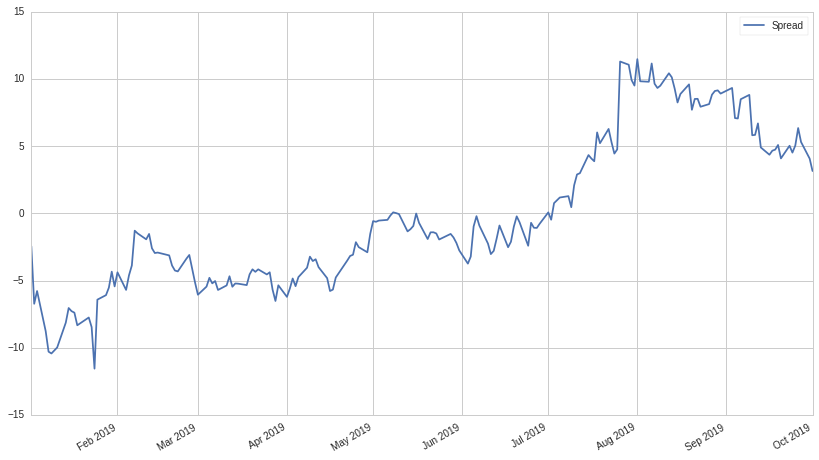

In [15]:
z = HedgeModel(p)

# Method 4: P/E Ratio

This method attempts to predict when to buy a stock based on the company's price to earnings ratio. Companies within the same industry are expected to have similar PE ratios. If we can find a company with a particularly high P/E ratio then we should purchase it with the expectation that the price will rise soon.

## Data Collection/Processing: 

In [16]:
from quantopian.pipeline import Pipeline
from quantopian.pipeline.domain import US_EQUITIES
from quantopian.research import run_pipeline
from quantopian.pipeline.data import EquityPricing
from quantopian.pipeline.data import Fundamentals
from quantopian.pipeline.data.morningstar import Fundamentals

#Set industry you would like to trade in
    #EX: 31165130 = Electronic Gaming & Multimedia
industry = [31165130]
industries = Fundamentals.morningstar_industry_code.latest
industry_filter = industries.element_of(industry)

## The Solution: implement a data science solution to the problem you are trying to solve.

In [17]:
# Pipeline definition
def make_pipeline():
    
    close_price = EquityPricing.close.latest
    pe_ratio = Fundamentals.pe_ratio.latest 
    ind_code = Fundamentals.morningstar_industry_code.latest
    #Get the difference between company and industry average PE ratio
    pe_ratio_dev = pe_ratio.demean(groupby=ind_code)
    
    return Pipeline(
        columns={
            'close' : close_price,
            'pe_ratio_dev' : pe_ratio_dev,
        },
        domain=US_EQUITIES,
        screen=(industry_filter & pe_ratio.notnull() & close_price.notnull()))

# Run the pipeline from 2010 to 2019
pe_pipe = run_pipeline(
    make_pipeline(),
    start_date='2010-01-01',
    end_date='2019-10-01')

In [18]:
#Find companies with highest positive deviation from industry average pe ratio
#Filter out unrealistically high PE ratios - most likely overvalued
pe_pipe = pe_pipe.loc[pe_pipe['pe_ratio_dev']<3000]
pe_pipe.groupby(level = 1).max().sort_values(by = 'pe_ratio_dev', ascending = False).head(10)

,close,pe_ratio_dev
Equity(16820 [TTWO]),137.980,2505.101390
Equity(2602 [EA]),148.930,1328.028429
Equity(33566 [GLUU]),11.530,472.467612
Equity(46868 [CMCM]),35.070,384.837153
Equity(47455 [DSKY]),23.650,362.379528
Equity(25810 [WZEN]),3.550,349.341552
Equity(22300 [CNVR]),0.244,314.555196
Equity(12614 [THQI]),8.280,312.709990
Equity(42277 [ZNGA]),6.490,228.388248
Equity(8353 [XRIT]),5.550,227.569562


## Results: summarize and visualize the results discovered from the analysis

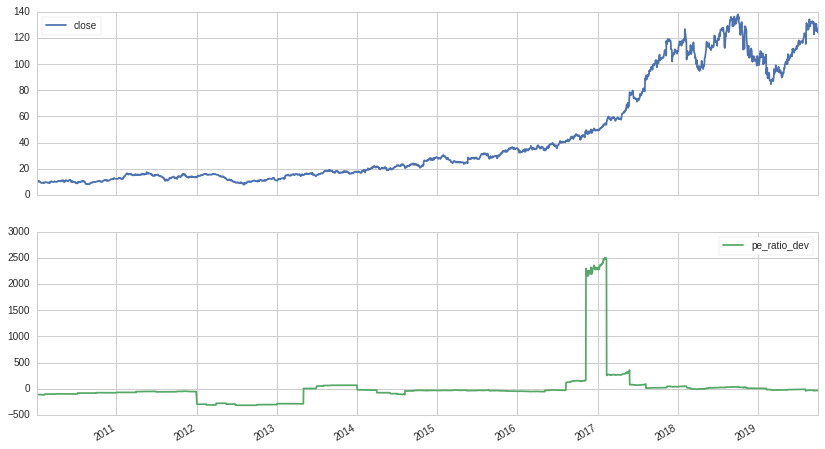

In [19]:
# Filter for TTWO - Take Two Interactive Software
TTWO_output = pe_pipe.xs(
    symbols('TTWO'),
    level = 1
)

# Plot results for TTWO
TTWO_output.plot(subplots=True);